In [1]:
# Install PyGithub via: $ pip install PyGithub
from github import Github
import pandas as pd
# First create a Github instance:

# using an access token
token = input()
g = Github(token)

# You can get the access token by going to github.com:
# Click on your avatar -> Settings -> Developer settings -> Personal access tokens 
# -> Tokens (classic) -> Generate new token

# Specify the repository details
repo_owner = 'facebook'
repo_name = 'react'

# Get the repository object
repo = g.get_repo(f"{repo_owner}/{repo_name}")

# Get all open pull requests
open_prs = repo.get_pulls(state='open')

# Get all closed pull requests
closed_prs = repo.get_pulls(state='closed')

# Print the open pull requests

commit_data = []

# function get all commit in a pull request

def get_data_pull_request(commits) :
    commit_data = []
    for commit in commits :
        list_file_changed =[]
        for file in commit.files :
            list_file_changed.append(file.filename)
        commit_data.append({
            'Commit ID': commit.sha,
            'Commit Message': commit.commit.message,
            'Author Name': commit.commit.author.name,
            'Author Email': commit.commit.author.email,
            'Date': commit.commit.author.date,
            'Files Changed': list_file_changed
        })

    return commit_data




for pr in open_prs:
    print(f"#{pr.number}: {pr.title}")
    pull_request = repo.get_pull(pr.number)
    commits = pull_request.get_commits()
    commit_data += get_data_pull_request(commits=commits)
    
    
# For more reference, check out the PyGithub documentation: https://pygithub.readthedocs.io/en/latest/introduction.html
# Or simply ask ChatGPT for help =)))

#26868: upgrade rimraf to version 5.0.1
#26859: Update README.md
#26858: Clean up enableSyncDefaultUpdates flag a bit
#26854: Scaffolding for <Catch>
#26853: Count read-only state values as stable in exhaustive-deps
#26852: package.json: cleanup deprecated scripts
#26844: Add support for 'crossorigin' attribute on bootstrapScripts and bootstrapModules
#26843: Destroy insertion effects when deleting previously hidden subtrees
#26842: Always trigger componentWillUnmount in StrictMode
#26836: React-Bootstrap
#26832: Make scheduleHydration awaitable
#26827: Remove XHR support from Flight
#26822: ESLint rule for detecting function calls inside useState (for recommending lazy initialization)
#26818: Bump update-notifier to 6.0.2
#26813: Remove redundant __DEV__ check in jsxWithValidation function
#26811: Update README.md
#26809: Example of missing case for dependency analysis
#26795: [Flight] Preinitialize Imports
#26792: Allow wrapping context provider in lazy
#26790: Allow non-latin charac

In [3]:
df = pd.DataFrame(commit_data )
df.to_csv('data.csv',index= False) # lưu dữ liệu vừa lây về vào file data.csv
df

NameError: name 'commit_data' is not defined

In [4]:
df = pd.read_csv('data.csv',parse_dates=['Date'])
df.info() # kiểm tra thông tin của các trường dữ liệu xem có bị mất mát không

df = df.dropna() # xóa những thông tin bị mất ra khỏi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Commit ID       934 non-null    object        
 1   Commit Message  932 non-null    object        
 2   Author Name     934 non-null    object        
 3   Author Email    934 non-null    object        
 4   Date            934 non-null    datetime64[ns]
 5   Files Changed   934 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 43.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 0 to 933
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Commit ID       932 non-null    object        
 1   Commit Message  932 non-null    object        
 2   Author Name     932 non-null    object        
 3   Author Email    932 non-null    object        
 4   Date

In [5]:
# cleanning data 

df = df.drop(['Commit ID' ,'Author Email'], axis= 1)

df

,Commit Message,Author Name,Date,Files Changed
0,upgrade rimraf to version 5.0.1,Martin Torp,2023-05-29 04:50:13,"['fixtures/fizz/package.json', 'fixtures/fizz/..."
1,Update README.md\n\nI think it should be bug-f...,sanskritiadt,2023-05-26 10:58:56,['README.md']
2,Clean up enableSyncDefaultUpdates flag a bit,Rick Hanlon,2023-05-26 01:57:24,['packages/react-art/src/__tests__/ReactART-te...
3,Add feature flag for <Catch> et al\n\nAdds an ...,Andrew Clark,2023-05-25 16:44:58,"['packages/shared/ReactFeatureFlags.js', 'pack..."
4,Scaffolding for <Catch>\n\nExposes the <Catch>...,Andrew Clark,2023-05-25 16:46:12,['packages/react-dom/src/__tests__/ReactDOMFiz...
...,...,...,...,...
929,Move iframe files to fixtures directory,Damien Maillard,2020-05-20 10:57:22,['fixtures/devtools/iframe/iframe-other-origin...
930,Make iframe server file executable,Damien Maillard,2020-07-06 14:41:47,['fixtures/devtools/iframe/server.js']
931,Merge remote-tracking branch 'dmail-fork/impro...,Joel DSouza,2020-07-12 08:28:45,['fixtures/devtools/iframe/iframe-other-origin...
932,DevTools: Iframe support\n\n\nDevTools: Iframe...,Joel DSouza,2020-07-14 08:24:54,"['fixtures/devtools/regression/14.9.html', 'fi..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 0 to 933
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Commit Message  932 non-null    object        
 1   Author Name     932 non-null    object        
 2   Date            932 non-null    datetime64[ns]
 3   Files Changed   932 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ KB


In [7]:
#procesing data 
df['Date'] = df['Date'].dt.date  # remove time in colums date
df['Date'] = pd.to_datetime(df['Date'])
# thêm cột năm và cột tháng vào data frame

df



,Commit Message,Author Name,Date,Files Changed
0,upgrade rimraf to version 5.0.1,Martin Torp,2023-05-29,"['fixtures/fizz/package.json', 'fixtures/fizz/..."
1,Update README.md\n\nI think it should be bug-f...,sanskritiadt,2023-05-26,['README.md']
2,Clean up enableSyncDefaultUpdates flag a bit,Rick Hanlon,2023-05-26,['packages/react-art/src/__tests__/ReactART-te...
3,Add feature flag for <Catch> et al\n\nAdds an ...,Andrew Clark,2023-05-25,"['packages/shared/ReactFeatureFlags.js', 'pack..."
4,Scaffolding for <Catch>\n\nExposes the <Catch>...,Andrew Clark,2023-05-25,['packages/react-dom/src/__tests__/ReactDOMFiz...
...,...,...,...,...
929,Move iframe files to fixtures directory,Damien Maillard,2020-05-20,['fixtures/devtools/iframe/iframe-other-origin...
930,Make iframe server file executable,Damien Maillard,2020-07-06,['fixtures/devtools/iframe/server.js']
931,Merge remote-tracking branch 'dmail-fork/impro...,Joel DSouza,2020-07-12,['fixtures/devtools/iframe/iframe-other-origin...
932,DevTools: Iframe support\n\n\nDevTools: Iframe...,Joel DSouza,2020-07-14,"['fixtures/devtools/regression/14.9.html', 'fi..."


In [8]:
df['Years'] = df['Date'].dt.year
df['Months'] = df['Date'].dt.month_name()
df['Days'] = df['Date'].dt.day_name()
df

,Commit Message,Author Name,Date,Files Changed,Years,Months,Days
0,upgrade rimraf to version 5.0.1,Martin Torp,2023-05-29,"['fixtures/fizz/package.json', 'fixtures/fizz/...",2023,May,Monday
1,Update README.md\n\nI think it should be bug-f...,sanskritiadt,2023-05-26,['README.md'],2023,May,Friday
2,Clean up enableSyncDefaultUpdates flag a bit,Rick Hanlon,2023-05-26,['packages/react-art/src/__tests__/ReactART-te...,2023,May,Friday
3,Add feature flag for <Catch> et al\n\nAdds an ...,Andrew Clark,2023-05-25,"['packages/shared/ReactFeatureFlags.js', 'pack...",2023,May,Thursday
4,Scaffolding for <Catch>\n\nExposes the <Catch>...,Andrew Clark,2023-05-25,['packages/react-dom/src/__tests__/ReactDOMFiz...,2023,May,Thursday
...,...,...,...,...,...,...,...
929,Move iframe files to fixtures directory,Damien Maillard,2020-05-20,['fixtures/devtools/iframe/iframe-other-origin...,2020,May,Wednesday
930,Make iframe server file executable,Damien Maillard,2020-07-06,['fixtures/devtools/iframe/server.js'],2020,July,Monday
931,Merge remote-tracking branch 'dmail-fork/impro...,Joel DSouza,2020-07-12,['fixtures/devtools/iframe/iframe-other-origin...,2020,July,Sunday
932,DevTools: Iframe support\n\n\nDevTools: Iframe...,Joel DSouza,2020-07-14,"['fixtures/devtools/regression/14.9.html', 'fi...",2020,July,Tuesday


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Data Analyis
# những file được sửa đổi nhiều nhất
changed_files = []

for files in df['Files Changed'] :
    files_list = files.split(",") 
    changed_files.extend(files_list)

files_freq_changed = pd.Series(changed_files).value_counts()

files_freq_changed.head(10)

 'packages/react-dom/src/__tests__/ReactDOMFizzServer-test.js'     69
 'packages/react-devtools-extensions/edge/manifest.json'           64
 'packages/react-devtools-extensions/firefox/manifest.json'        64
 'packages/react-devtools-extensions/chrome/manifest.json'         63
 'packages/shared/forks/ReactFeatureFlags.native-fb.js'            59
 'packages/shared/forks/ReactFeatureFlags.test-renderer.www.js'    58
['.circleci/config.yml'                                            58
 'packages/shared/forks/ReactFeatureFlags.test-renderer.js'        57
 'packages/shared/forks/ReactFeatureFlags.native-oss.js'           57
 'packages/shared/ReactFeatureFlags.js'                            57
Name: count, dtype: int64

In [11]:
# 5 people commit the most

df['Author Name'].value_counts().head()

Author Name
Fran Dios     94
Josh Story    52
eps1lon       47
tiziodcaio    37
lijianan      36
Name: count, dtype: int64

In [12]:
# Mesage commit the most 
df['Commit Message'].value_counts().head()

Commit Message
Update config.yml                               28
Merge branch 'main' into getChildrenAsJSX       18
Merge branch 'facebook:main' into main          12
Merge remote-tracking branch 'upstream/main'    10
Merge branch 'main' into indexOf                 8
Name: count, dtype: int64

[Text(0.5, 1.0, 'Daily frequency of commits 11/2019 - 5/2023')]

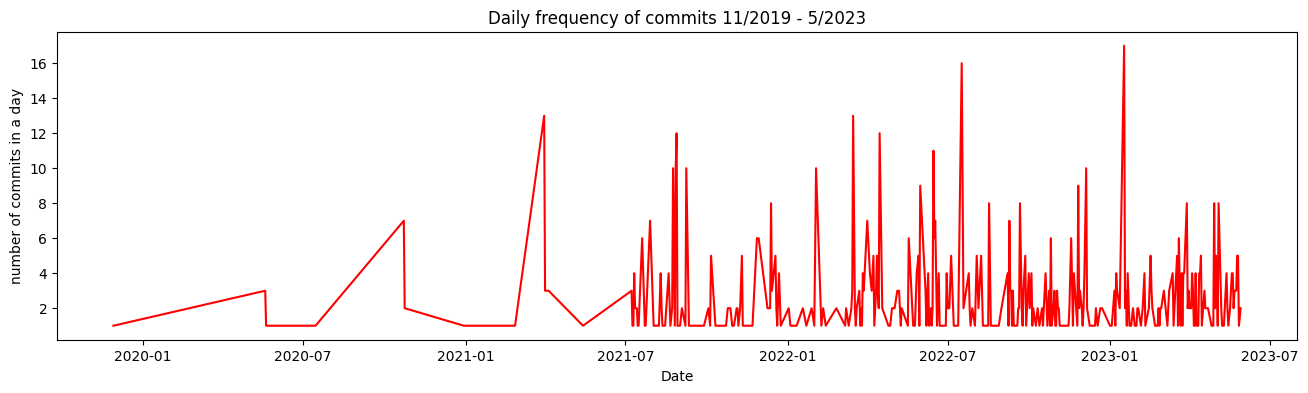

In [13]:
# biểu đồ đường số lượng commit trong một ngày

df_line = pd.DataFrame(df.groupby(['Date'],sort=False).size().reset_index())

df_line = df_line.rename(columns={ 0 :'number of commits in a day'})


fig, ax = plt.subplots(figsize=(16,4), dpi=100)
sns.lineplot(data = df_line , x= 'Date', y = 'number of commits in a day' , c = 'r')
ax.set(
    title = 'Daily frequency of commits 11/2019 - 5/2023'
)


,Author Name,percent
0,Fran Dios,10.1
1,Josh Story,5.6
2,eps1lon,5.0
3,tiziodcaio,4.0
4,lijianan,3.9
5,Andrew Clark,3.3
6,Albert Jokelin,3.2
7,Biki-das,3.1
8,Tianyu Yao,2.5
9,Sanjoth J Rai,1.9


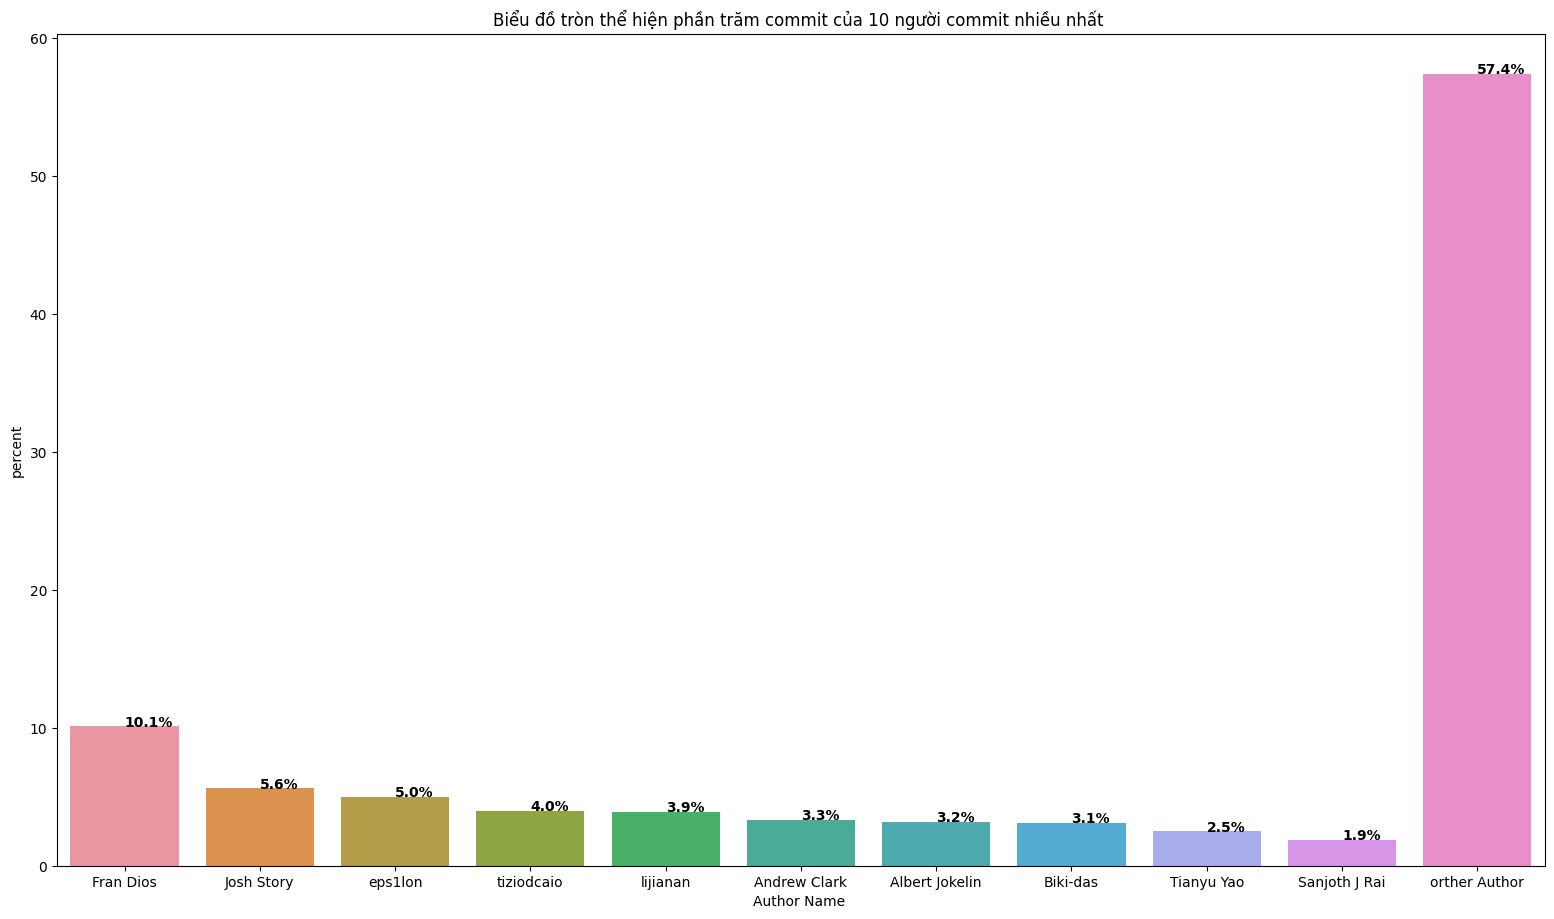

In [15]:

# top 10 người có lượng commit nhiều nhất

Author_commit =  df['Author Name'].value_counts()

# biểu đồ thể hiện phần trăm lượng commit của các tác giả
percent_Author_Commit = Author_commit.head(10)
orther_Author_commit = Author_commit[10:].sum()
percent_Author_Commit['orther Author'] = orther_Author_commit
percent_Author_Commit = (percent_Author_Commit*100/df.shape[0]).round(1)
percent_Author_Commit = pd.DataFrame(percent_Author_Commit)
percent_Author_Commit = percent_Author_Commit.reset_index()
percent_Author_Commit =  percent_Author_Commit.rename(columns={'count' : 'percent'})
fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
ax = sns.barplot(data= percent_Author_Commit , x = 'Author Name' , y = 'percent')

ax.set_title("Biểu đồ tròn thể hiện phần trăm commit của 10 người commit nhiều nhất ")

ax.set_xlabel('Author Name ')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

percent_Author_Commit


In [74]:
#who is Active Contributors:
author_counts = df['Author Name'].value_counts()
author_counts

Author Name
Fran Dios       94
Josh Story      54
eps1lon         47
tiziodcaio      37
lijianan        36
                ..
David L. Qiu     1
Wray Bowling     1
c0dedance        1
Rubén Norte      1
Gianfranco       1
Name: count, Length: 211, dtype: int64

In [36]:
# Kiểm tra tần suất commit theo ngày
commit_frequency_by_date = df['Date'].value_counts()

# Kiểm tra tần suất commit theo tác giả
commit_frequency_by_author = df['Author Name'].value_counts()

# In ra kết quả
print("Commit frequency by date:")
print(commit_frequency_by_date)

print("\nCommit frequency by author:")
print(commit_frequency_by_author)

Commit frequency by date:
Date
2022-07-17 18:01:55    3
2022-07-17 15:53:16    3
2022-07-17 15:59:16    3
2022-07-17 15:56:42    3
2022-06-09 14:16:41    3
                      ..
2022-10-01 16:02:43    1
2022-09-27 13:29:29    1
2022-09-27 13:41:21    1
2022-09-28 06:05:36    1
2019-11-29 09:24:26    1
Name: count, Length: 896, dtype: int64

Commit frequency by author:
Author Name
Fran Dios       94
Josh Story      54
eps1lon         47
tiziodcaio      37
lijianan        36
                ..
zhangchen        1
David L. Qiu     1
Wray Bowling     1
c0dedance        1
Gianfranco       1
Name: count, Length: 211, dtype: int64


KeyError: 'Days'

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import string

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('data.csv')
df['Commit Message'] = df['Commit Message'].astype(str)
# Tạo một set chứa các ký tự đặc biệt
special_chars = set(string.punctuation)

# Tách các từ trong commit messages và bỏ qua các ký tự đặc biệt
all_words = []
for message in df['Commit Message']:
    words = word_tokenize(message)  # Tách các từ trong commit message
    filtered_words = [word for word in words if word not in special_chars]  # Bỏ qua các ký tự đặc biệt
    all_words.extend(filtered_words)  # Thêm các từ vào danh sách

# Đếm tần suất xuất hiện của từng từ
freq_dist = FreqDist(all_words)

# Lấy danh sách các từ phổ biến và tần suất xuất hiện
common_words = freq_dist.most_common(25)  # Lấy 25 từ phổ biến nhất

# In kết quả
for word, frequency in common_words:
    print(f"Word: {word}\t\tFrequency: {frequency}")

Word: the		Frequency: 337
Word: to		Frequency: 296
Word: a		Frequency: 179
Word: in		Frequency: 165
Word: for		Frequency: 154
Word: and		Frequency: 149
Word: is		Frequency: 141
Word: Merge		Frequency: 127
Word: branch		Frequency: 125
Word: into		Frequency: 124
Word: of		Frequency: 101
Word: it		Frequency: 87
Word: that		Frequency: 79
Word: fix		Frequency: 78
Word: 'main		Frequency: 74
Word: test		Frequency: 74
Word: Add		Frequency: 73
Word: Fix		Frequency: 71
Word: not		Frequency: 62
Word: this		Frequency: 62
Word: Update		Frequency: 60
Word: be		Frequency: 59
Word: use		Frequency: 54
Word: ``		Frequency: 54
Word: will		Frequency: 52


In [30]:
common_words = pd.DataFrame(common_words,columns=['word','Frequency'])


,word,Frequency
0,the,337
1,to,296
2,a,179
3,in,165
4,for,154
5,and,149
6,is,141
7,Merge,127
8,branch,125
9,into,124


Text(0.5, 1.0, 'Biểu đồ thể hiện số lượng những từ xuất hiện nhiều nhất trong commit Message')

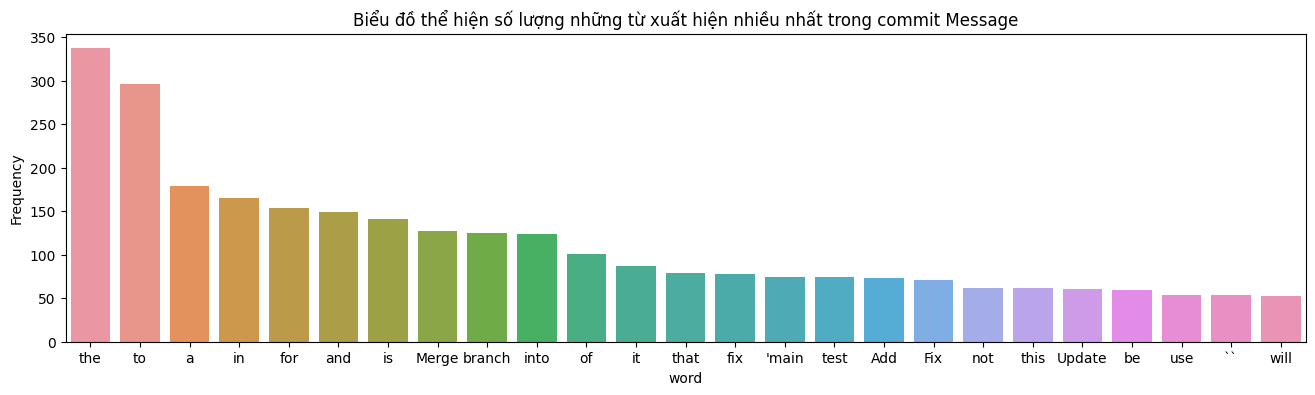

In [35]:
# bar plot 
fig , ax = plt.subplots(figsize =(16,4))
ax = sns.barplot(data= common_words , x= 'word' , y = 'Frequency' )

ax.set_title("Biểu đồ thể hiện số lượng những từ xuất hiện nhiều nhất trong commit Message")